# Introduction to Statistics 
- Summarizing data. 
- Plotting data.
- Confidence intervals.
- Statistical tests.

#### About this Notebook
In this notebook, we download a dataset with data about customers. Then, we calculate statistical measures and plot distributions. Finally, we perform statistical tests.

In [1]:
# Run this cell :)
1+2

3

### Importing Needed packages
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

In [2]:
# Uncomment next command if you need to install a missing module
#!pip install statsmodels
import matplotlib.pyplot as plt
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
import numpy as np
%matplotlib inline

#### Print the current version of Python:

In [3]:
import sys 
print(sys.version)

3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


### Downloading Data
Run system commands using `!` (platform dependant)

In [4]:
import sys 
if sys.platform.startswith('linux'):
    !ls
elif sys.platform.startswith('freebsd'):
    !ls
elif sys.platform.startswith('darwin'):
    !ls
elif sys.platform.startswith('win'):
    !dir    

Basic_statistics.ipynb
Icon?
Intro_to_Pandas_handout.pdf
MIE1624H+Lecture+3+-+Basic+Statistics.pdf
News_Python_API.ipynb
Overview_of_distributions.ipynb
customer_dbase_sel.csv


To download the data, we will use `!wget` (on DataScientistWorkbench)

In [5]:
if sys.platform.startswith('linux'):
    !wget -O /resources/customer_dbase_sel.csv http://analytics.romanko.ca/data/customer_dbase_sel.csv


## Understanding the Data

### `customer_dbase_sel.csv`:
We have downloaded an extract from IBM SPSS sample dataset with customer data, **`customer_dbase_sel.csv`**, which contains customer-specific data such as age, income, credit card spendings, commute type and time, etc. [Dataset source](http://www-01.ibm.com/support/knowledgecenter/SSLVMB_20.0.0/com.ibm.spss.statistics.help/data_files.htm)

- **custid** e.g. 0648-AIPJSP-UVM (customer id)
- **gender** e.g. Female or Male
- **age** e.g. 26
- **debtinc** e.g. 11.1 (debt to income ratio in %)
- **card** e.g. Visa, Mastercard (type of primary credit card)
- **carditems** e.g. 1, 2, 3 ... (# of primary credit card purchases in the last month)
- **cardspent** e.g 228.27 (amount in \$ spent on the primary credit card last month)
- **commute** e.g. Walk, Car, Bus (commute type)
- **commutetime** e.g. 22 (time in minutes to commute to work)
- **income** e.g. 16.00 (income in thousands \$ per year)
- **edcat** e.g. College degree, Post-undergraduate degree (education level)

## Reading the data in

In [6]:
url = "http://analytics.romanko.ca/data/customer_dbase_sel.csv"
df = pd.read_csv(url)

## On DataScientistWorkbench you can read from /resources directory
#df = pd.read_csv("/resources/customer_dbase_sel.csv")

# display first 5 rows of the dataset
df.head()

,custid,gender,age,age_cat,debtinc,card,carditems,cardspent,cardtype,creddebt,...,carown,region,ed_cat,ed_years,job_cat,employ_years,emp_cat,retire,annual_income,inc_cat
0,3964-QJWTRG-NPN,Female,20,18-24,11.1,Mastercard,5,81.66,None,1.20,...,Own,Zone 1,Some college,15,Managerial and Professional,0,Less than 2,No,31000.0,$25 - $49
1,0648-AIPJSP-UVM,Male,22,18-24,18.6,Visa,5,42.60,Other,1.22,...,Own,Zone 5,College degree,17,Sales and Office,0,Less than 2,No,15000.0,Under $25
2,5195-TLUDJE-HVO,Female,67,>65,9.9,Visa,9,184.22,None,0.93,...,Own,Zone 3,High school degree,14,Sales and Office,16,More than 15,No,35000.0,$25 - $49
3,4459-VLPQUH-3OL,Male,23,18-24,5.7,Visa,17,340.99,None,0.02,...,Own,Zone 4,Some college,16,Sales and Office,0,Less than 2,No,20000.0,Under $25
4,8158-SMTQFB-CNO,Male,26,25-34,1.7,Discover,8,255.10,Gold,0.21,...,Lease,Zone 2,Some college,16,Sales and Office,1,Less than 2,No,23000.0,Under $25


### Data Exploration

In [7]:
# Summarize the data
df.describe()

,age,debtinc,carditems,cardspent,creddebt,commutetime,card2items,card2spent,cars,ed_years,employ_years,annual_income
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,46.939800,9.957800,10.19920,339.635878,1.874982,25.346739,4.666000,161.331270,2.134200,14.537600,9.740200,5.504060e+04
std,17.703312,6.423173,3.39279,248.382982,3.441425,5.890674,2.482434,146.798035,1.306037,3.294717,9.691062,5.554475e+04
min,18.000000,0.000000,0.00000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,6.000000,0.000000,9.000000e+03
25%,32.000000,5.175000,8.00000,184.860000,0.390000,21.000000,3.000000,67.682500,1.000000,12.000000,2.000000,2.400000e+04
50%,46.000000,8.800000,10.00000,278.655000,0.930000,25.000000,5.000000,125.455000,2.000000,14.000000,7.000000,3.800000e+04
75%,62.000000,13.500000,12.00000,422.402500,2.080000,29.000000,6.000000,208.612500,3.000000,17.000000,15.000000,6.700000e+04
max,79.000000,43.100000,23.00000,3926.410000,109.070000,48.000000,15.000000,2069.250000,8.000000,23.000000,52.000000,1.073000e+06


In [8]:
# Number of rows and columns in the data
df.shape

(5000, 30)

In [8]:
# Display column names
df.columns

Index(['custid', 'gender', 'age', 'age_cat', 'debtinc', 'card', 'carditems',
       'cardspent', 'cardtype', 'creddebt', 'commute', 'commutetime', 'card2',
       'card2items', 'card2spent', 'card2type', 'marital', 'homeown',
       'hometype', 'cars', 'carown', 'region', 'ed_cat', 'ed_years', 'job_cat',
       'employ_years', 'emp_cat', 'retire', 'annual_income', 'inc_cat'],
      dtype='object')

### Labeling Data

income > 30000  --> High-income --> 1  
income < 30000  --> Low-income  --> 0

In [9]:
# To label data into high-income and low-income
df['income_category'] = df['annual_income'].map(lambda x: 1 if x>30000 else 0)
df[['annual_income','income_category']].head()

,annual_income,income_category
0,31000.0,1
1,15000.0,0
2,35000.0,1
3,20000.0,0
4,23000.0,0


## Data Exploration
#### Select 4 data columns for visualizing:

In [10]:
viz = df[['cardspent','debtinc','carditems','commutetime']]
viz.head()

,cardspent,debtinc,carditems,commutetime
0,81.66,11.1,5,22.0
1,42.60,18.6,5,29.0
2,184.22,9.9,9,24.0
3,340.99,5.7,17,38.0
4,255.10,1.7,8,32.0


#### Compute descriptive statistics for the data:

In [11]:
viz.describe()

,cardspent,debtinc,carditems,commutetime
count,5000.000000,5000.000000,5000.00000,4998.000000
mean,339.635878,9.957800,10.19920,25.346739
std,248.382982,6.423173,3.39279,5.890674
min,0.000000,0.000000,0.00000,7.000000
25%,184.860000,5.175000,8.00000,21.000000
50%,278.655000,8.800000,10.00000,25.000000
75%,422.402500,13.500000,12.00000,29.000000
max,3926.410000,43.100000,23.00000,48.000000


Drop NaN (Not-a-Number) observations:

In [12]:
df[['commutetime']].dropna().count()

commutetime    4998
dtype: int64

Print observations with NaN `commutetime`:

In [13]:
print( df[np.isnan(df["commutetime"])] )

               custid  gender  age age_cat  debtinc      card  carditems  \
965   3622-JHDLVP-V1E  Female   48   35-49      6.5  Discover         12   
2734  0860-BRGALK-LLR  Female   68     >65     17.3     Other          8   

      cardspent  cardtype  creddebt       ...         region          ed_cat  \
965      261.91  Platinum      2.25       ...         Zone 1  College degree   
2734     178.75  Platinum      1.08       ...         Zone 5    Some college   

     ed_years                                job_cat  employ_years  \
965        19                                Service            12   
2734       15  Operation, Fabrication, General Labor            20   

           emp_cat retire annual_income     inc_cat  income_category  
965       11 to 15     No      121000.0  $75 - $124                1  
2734  More than 15    Yes       23000.0   Under $25                0  

[2 rows x 31 columns]


#### Visualize data:

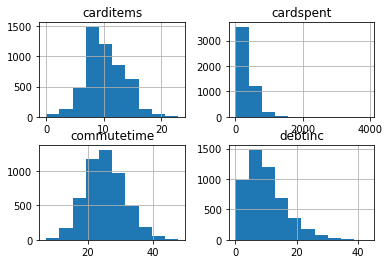

In [14]:
viz.hist()
plt.show()

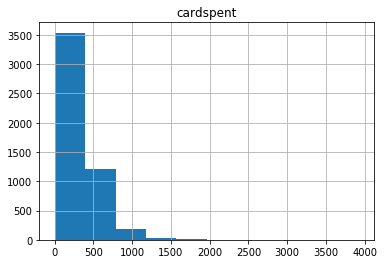

In [16]:
df[['cardspent']].hist()
plt.show()

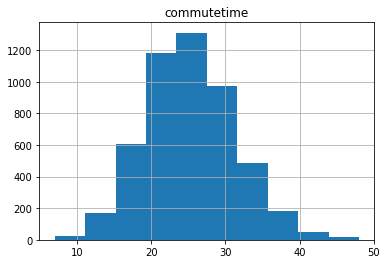

In [17]:
df[['commutetime']].hist()
plt.show()

## Confidence Intervals

For computing confidence intervals and performing simple statistical tests, we will use the `stats` sub-module of `scipy`:

In [15]:
from scipy import stats

Confidence intervals tell us how close we think the mean is to the true value, with a certain level of confidence.

We compute mean `mu`, standard deviation `sigma` and the number of observations `N` in our sample of the debt-to-income ratio:

In [19]:
mu, sigma = np.mean(df[['debtinc']]), np.std(df[['debtinc']])
print ("mean = %G, st. dev = %g" % (mu, sigma))


mean = 9.9578, st. dev = 6.42253


In [20]:
N = len(df[['debtinc']])
N

5000

The 95% confidence interval for the mean of `N` draws from a Normal distribution with mean `mu` and standard deviation `sigma` is

In [35]:
conf_int = stats.norm.interval( 0.95, loc = mu, scale = sigma/np.sqrt(N) )
conf_int

(array([ 9.7797798]), array([ 10.1358202]))

In [40]:
print ("95%% confidence interval for the mean of debt to income ratio = [%g %g]" % (conf_int[0], conf_int[1]))

95% confidence interval for the mean of debt to income ratio = [9.77978 10.1358]


In [37]:
type(conf_int)

tuple

## Statistical Tests

Select columns by name:

In [38]:
adf=df[['gender','cardspent','debtinc']]
print(adf['gender'])

0       Female
1         Male
2       Female
3         Male
4         Male
5         Male
6       Female
7       Female
8       Female
9         Male
10      Female
11      Female
12        Male
13        Male
14      Female
15      Female
16      Female
17        Male
18      Female
19      Female
20        Male
21        Male
22        Male
23        Male
24        Male
25      Female
26      Female
27      Female
28      Female
29        Male
         ...  
4970    Female
4971      Male
4972    Female
4973      Male
4974      Male
4975    Female
4976      Male
4977      Male
4978      Male
4979      Male
4980    Female
4981      Male
4982      Male
4983    Female
4984      Male
4985    Female
4986      Male
4987      Male
4988    Female
4989    Female
4990    Female
4991      Male
4992    Female
4993      Male
4994      Male
4995      Male
4996      Male
4997    Female
4998    Female
4999    Female
Name: gender, Length: 5000, dtype: object


Compute means for `cardspent` and `debtinc` for the male and female populations:

In [39]:
gender_data = adf.groupby('gender')
print (gender_data.mean())

         cardspent   debtinc
gender                      
Female  323.343489  9.985221
Male    356.606840  9.929236


Compute mean for `cardspent` for female population only:

In [41]:
adf[adf['gender'] == 'Female']['cardspent'].mean()

323.34348882791136

We have seen above that the mean `cardspent` and `debtinc` in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with `scipy.stats.ttest_ind()`:

In [42]:
female_card = adf[adf['gender'] == 'Female']['cardspent']
male_card = adf[adf['gender'] == 'Male']['cardspent']
tc, pc = stats.ttest_ind(female_card, male_card)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -4.74396  p = 2.15418e-06


In the case of amount spent on primary credit card, we conclude that men tend to charge more on their primary card (`p-value = 2e-6 < 0.05`, statistically significant).

In [43]:
female_debt = adf[adf['gender'] == 'Female']['debtinc']
male_debt   = adf[adf['gender'] == 'Male']['debtinc']
td, pd      = stats.ttest_ind(female_debt, male_debt)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = 0.308069  p = 0.758043


In the case of debt-to-income ratio, we conclude that there is no significant difference between men and women (`p-value = 0.758 > 0.05`, not statistically significant).

## Plot Data

### Plot statistical measures for amounts spent on primary credit card

#### Use `boxplot` to compare medians, 25% and 75% percentiles, 12.5% and 87.5% percentiles:

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


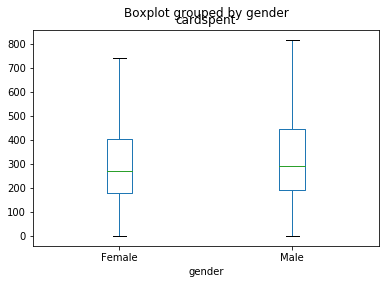

In [45]:
adf.boxplot(column='cardspent', by='gender', grid=False, showfliers=False)
plt.show()

#### Plot observations with `boxplot`:

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


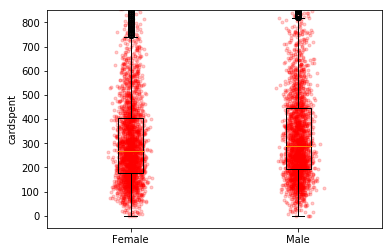

In [47]:
gend = list(['Female', 'Male'])
for i in [1,2]:
    y = adf.cardspent[adf.gender==gend[i-1]].dropna()        
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
plt.boxplot([female_card,male_card],labels=gend)
plt.ylabel("cardspent")
plt.ylim((-50,850))    
plt.show()

### Plot age vs. income data to find some interesting relationships.

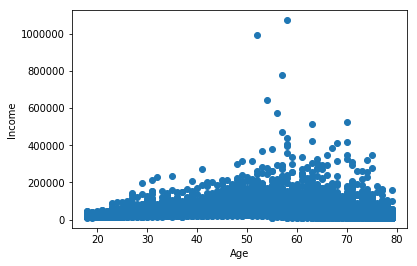

In [48]:
plt.scatter(df.age, df.annual_income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()